In [289]:
import numpy as np
import pandas as pd
import spatialpower.tissue_generation.assign_labels as assign_labels
import spatialpower.tissue_generation.visualization as viz
import spatialpower.neighborhoods.permutationtest as perm_test
import matplotlib.pyplot as plt
import networkx as nx 
import os
import gzip

In [ ]:
%%bash 

time python spatialpower/tissue_generation/random_circle_packing.py -x 1000 -y 1000 --visualization --rmax 10 --rmin 10 -o sample_results/ 

# see python spatialpower/tissue_generation/random_circle_packing.py --help for full options

### Load circle packings

In [94]:
#with gzip.open("./sample_results/A.npy.gz", "rb") as f:
#    A = np.load(f)
#C =  np.load('./sample_results/C.npy')

In [240]:
A = np.load('./sample_results/adjacency_matrix.npy')
C =  np.load('./sample_results/coord_C.npy')

#change to A and C
#A = np.load('./sample_results/A.npy')
#C =  np.load('./sample_results/C.npy')

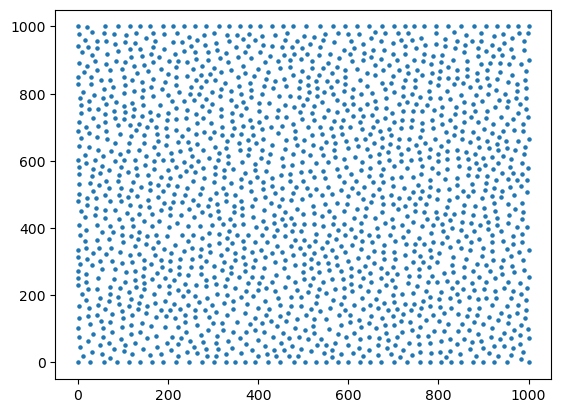

In [192]:
plt.scatter(C[:,0],C[:,1], s=5)

### Set parameters

In [243]:
cell_type_probabilities = np.array([0.25, 0.25, 0.25, 0.25])


neighborhood_probabilities = np.array(([0.25, 0.25, 0.25, 0.25],
                                        [0.25, 0.25, 0.25, 0.25],
                                        [0.25, 0.25, 0.25, 0.25],
                                        [0.25, 0.25, 0.25, 0.25]))


In [270]:
neighborhood_probabilities

array([[0.8 , 0.13, 0.03, 0.04],
       [0.13, 0.29, 0.29, 0.29],
       [0.03, 0.29, 0.39, 0.29],
       [0.04, 0.29, 0.29, 0.38]])

In [258]:
cell_type_probabilities

array([0.25, 0.25, 0.25, 0.25])

In [253]:
neighborhood_probabilities = np.array(([0.80, 0.13, 0.03, 0.04],
                                        [0.13, 0.29, 0.29, 0.29],
                                        [0.03, 0.29, 0.39, 0.29],
                                        [0.04, 0.29, 0.29, 0.38]))

In [19]:
neighborhood_probabilities = np.array(([0.05, 0.1, 0.1, 0.7],
                                        [0.1, 0.4, 0.4, 0.1],
                                        [0.1, 0.4, 0.4, 0.1],
                                        [0.7, 0.1, 0.1, 0.1]))

### Optimized Assignment

Estimated runtime ~15 mins with no GPU

In [259]:
cell_assignments = assign_labels.optimize(A, cell_type_probabilities, neighborhood_probabilities, learning_rate=1e-5, iterations = 10)

87767.23
84865.62
82067.67
79369.64
constraint  155574.05
20172.648
19711.742
19273.768
18857.582
constraint  21293.957
19180.594
19151.826
19124.883
19099.635
constraint  10261.795
33162.613
33155.332
33148.098
33140.887
constraint  9831.326
59649.594
59629.008
59608.426
59587.848
constraint  9609.432
108340.734
108275.04
108209.37
108143.76
constraint  9244.379
195479.03
195261.36
195043.81
194826.48
constraint  8640.297
340570.62
339845.72
339122.03
338399.84
constraint  7654.3525
543020.0
540746.4
538479.4
536222.0
constraint  6139.2144
706413.7
700248.06
694122.44
688040.75
constraint  4085.2402


In [266]:
def build_assignment_matrix(attribute_dict, n_cell_types):
    data = list(attribute_dict.items())
    data = np.array(data) # Assignment matrix
    
    B = np.zeros((data.shape[0],n_cell_types)) # Empty matrix
    
    for i in range(0, data.shape[0]):
        t = data[i,1]
        B[i,t] = 1
    
    return B 

In [267]:
B = cell_assignments.copy()

### Actual results

In [262]:
perm_test.calculate_neighborhood_distribution(A, B)

array([[0.269967  , 0.22778878, 0.2520462 , 0.23858086],
       [0.24271054, 0.23018401, 0.25665251, 0.24416136],
       [0.2509552 , 0.23817523, 0.26469038, 0.23784585],
       [0.24995627, 0.23208455, 0.25065598, 0.23063654]])

In [201]:
np.divide(np.sum(B, axis=0), np.sum(B))

array([0.24407328, 0.24030172, 0.25377155, 0.26185345])

In [268]:
position_dict = dict()
for i in range(0, C.shape[0]):
    position_dict[i] = C[i, :]

### Create visualization of tissue

In [269]:
viz.make_vor(1000, np.argmax(cell_assignments, axis=1), position_dict, 4, './sample_results/', 'test_opt_08', [x for x in range(0, C.shape[0])])

<Figure size 640x480 with 0 Axes>

In [207]:
opt_assign = cell_assignments

In [245]:
np.argmax(opt_assign, axis=1)

DeviceArray([0, 0, 2, ..., 2, 2, 2], dtype=int32)

### Heuristic assignment

Estimated runtime ~30s

In [271]:
graph = nx.from_numpy_array(A)

cell_assignments = assign_labels.heuristic_assignment(graph, cell_type_probabilities, neighborhood_probabilities, mode='graph', dim=1000, position_dict=position_dict, grid_size=50, revision_iters=100, n_swaps=25)

In [272]:
B = build_assignment_matrix(cell_assignments, n_cell_types=4)

In [219]:
len(cell_assignments)

1798

In [229]:
A.shape

(1798, 1798)

### observed results


In [273]:
perm_test.calculate_neighborhood_distribution(A, B)

array([[0.50604122, 0.17473348, 0.15177683, 0.16744847],
       [0.19042636, 0.28984496, 0.24658915, 0.27313953],
       [0.16506339, 0.23837754, 0.29512091, 0.30143816],
       [0.17363569, 0.25497788, 0.2935472 , 0.27783923]])

In [22]:
np.divide(np.sum(B, axis=0), np.sum(B))

array([0.51264542, 0.16590794, 0.15553869, 0.16590794])

### Visualize results

In [274]:
viz.make_vor(1000, cell_assignments, position_dict, 4, './sample_results/', 'test_heuristic_08', [x for x in range(0, C.shape[0])])

<Figure size 640x480 with 0 Axes>

In [ ]:
Get output for further tools

In [ ]:
array = list(cell_assignments.values())

In [280]:
C.shape

(1798, 2)

In [284]:
data = np.column_stack((C, array))

In [290]:
colnames = ['x', 'y', 'ct']
df = pd.DataFrame(data, columns=colnames)
df.to_csv('data_sim.csv', index=False)